# Snabbrapport inför nästa kampanjperiod

Rekommendationer
- [kommer]
- [kommer]

Vad / när / hur

+ Vad säljer? – vilka kategorier driver mest intäkt?
+ Var säljer vi? – vilka städer står för störst intäkt?
+ När säljer vi? – finns tidsmönster/säsong i försäljningen?
+ Eventuella avvikelser – något oväntat mönster som sticker ut?

Nyckeltal

- Total intäkt och totalt antal enheter
- Intäkt per kategori
- Intäkt per stad


In [4]:
# DATA LOADING - för hela rapporten
import sys
import os
sys.path.append('..')

from src.io_utils import ladda_data

# Ladda data en gång för alla analyser
df = ladda_data('data/ecommerce_sales.csv')
print(f"Data laddad: {len(df)} ordrar redo för analys")

Data laddad: 2500 ordrar redo för analys


## Top 3 bäst säljande kategorier 2024

In [5]:
from src.metrics import ladda_data, get_top_3_categories

top3 = get_top_3_categories(df)
print("Topp 3 kategorier med högst intäkt:")
for category, revenue in top3.items():
    print(f"{category}: {int(round(revenue)):,} SEK".replace(",", " "))


Topp 3 kategorier med högst intäkt:
Electronics: 1 364 228 SEK
Sports: 734 653 SEK
Clothing: 586 745 SEK


# Denna del analyserar försäljningsdata för att ge insikter såsom:
- Hur ser en typisk order ut? – **AOV (Average Order Value)**  
- Spridning av ordervärden


## Genomsnittligt Ordervärde (AOV)

In [6]:
# AOV
from src.metrics import calculate_aov

aov = calculate_aov(df)
print(f"Genomsnittligt ordervärde: {aov:.2f} SEK")

Genomsnittligt ordervärde: 1401.11 SEK


# Spridning av Ordervärden

In [7]:
# Analysera spridningen
import matplotlib.pyplot as plt

# Grundläggande statistik
print("Spridning:")
print(f"Median: {df['revenue'].median():.2f} SEK")
print(f"Standardavvikelse: {df['revenue'].std():.2f} SEK")
print(f"Lägsta order: {df['revenue'].min():.2f} SEK")
print(f"Högsta order: {df['revenue'].max():.2f} SEK")

# %:er
print(f"25e %: {df['revenue'].quantile(0.25):.2f} SEK")
print(f"75e %: {df['revenue'].quantile(0.75):.2f} SEK")

Spridning:
Median: 1088.69 SEK
Standardavvikelse: 1166.94 SEK
Lägsta order: 50.00 SEK
Högsta order: 9192.60 SEK
25e %: 577.96 SEK
75e %: 1884.75 SEK


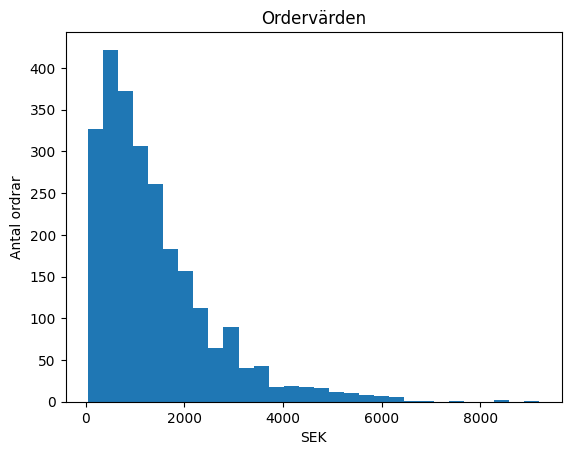

In [8]:
# Spridning av ordervärden
plt.hist(df['revenue'], bins=30)
plt.title('Ordervärden')
plt.xlabel('SEK')
plt.ylabel('Antal ordrar')
plt.show()

# Insikter
- Kunder handlar i genomsnitt för **1400 SEK** per order
- Majoriteten av ordrar ligger mellan **500 - 2500 SEK**
- Få kunder handlar för mycket höga eller låga belopp